In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
file_path = 'C:/Users/Fatima Hassan/Downloads/Hotel Reservations - Hotel Reservations.csv'
hotel_data= pd.read_csv(file_path)
# Display the first few rows of the DataFrame
hotel_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Data Overview 


This dataset can provide valuable insights into booking patterns, customer preferences, and operational aspects of hotel management. Analysis of this data can help in understanding customer behavior, occupancy rates, and revenue management. 

In [3]:
dataset_info = hotel_data.info()
dataset_description = hotel_data.describe()

dataset_info, dataset_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

(None,
        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
 count  36275.000000    36275.000000          36275.000000       36275.000000   
 mean       1.844962        0.105279              0.810724           2.204300   
 std        0.518715        0.402648              0.870644           1.410905   
 min        0.000000        0.000000              0.000000           0.000000   
 25%        2.000000        0.000000              0.000000           1.000000   
 50%        2.000000        0.000000              1.000000           2.000000   
 75%        2.000000        0.000000              2.000000           3.000000   
 max        4.000000       10.000000              7.000000          17.000000   
 
        required_car_parking_space     lead_time  arrival_year  arrival_month  \
 count                36275.000000  36275.000000  36275.000000   36275.000000   
 mean                     0.030986     85.232557   2017.820427       7.423653   
 std               

Key Statistics:

Total Entries: 36,275.

The dataset includes both numerical and categorical variables.
Most of the numerical variables are integers, except for avg_price_per_room, which is a float.
There are no missing values in any of the columns.
Range of Years: The arrival_year ranges from 2017 to 2018.
Average Price per Room: The average price per room is approximately 103.42 units.
Special Requests: On average, there are about 0.62 special requests per booking.
Previous Cancellations: The average number of previous cancellations is around 0.02.
Repeated Guests: About 2.56% of the bookings are from repeated guests.

# 1. Data Cleaning and Preprocessing 


In [4]:
# Checking for anomalies and missing values
missing_values = hotel_data.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]

# Checking for duplicate rows
duplicates = hotel_data[hotel_data.duplicated()]
duplicate_count = duplicates.shape[0]

missing_values_summary, duplicate_count, duplicates.head()

(Series([], dtype: int64),
 0,
 Empty DataFrame
 Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
 Index: [])

Missing Values: There are no missing values in any of the columns in the dataset.
duplicate values:There are no duplicate rows in the dataset. Each booking entry is unique.

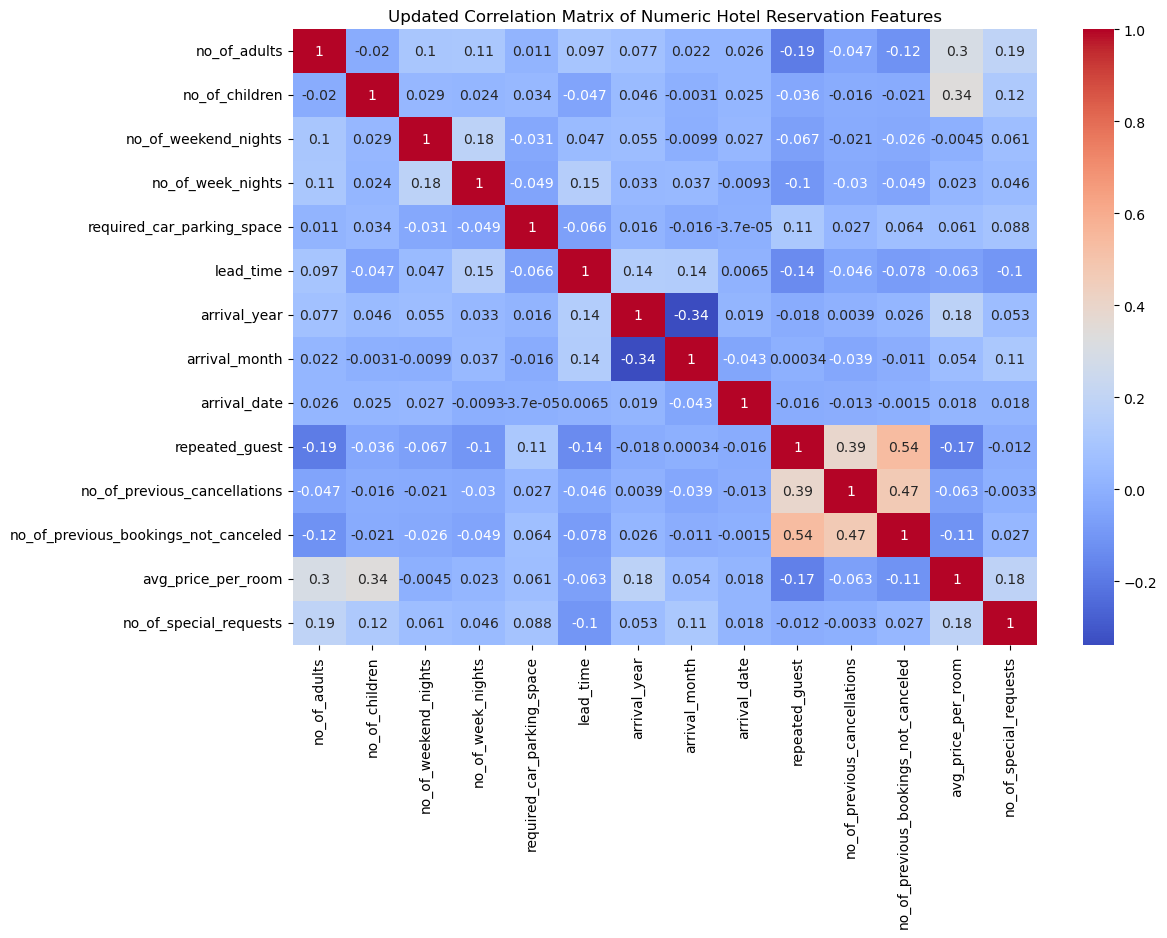

no_of_children
0     0.675909
1     0.666255
2     0.568053
3     0.736842
9     0.500000
10    1.000000
Name: booking_status_binary, dtype: float64

In [5]:
# Dropping non-numeric columns for correlation analysis
numeric_data = hotel_data.select_dtypes(include=['int64', 'float64'])

# Recalculating the correlation matrix with only numeric data
new_correlation_matrix = numeric_data.corr()

# Focused analysis: Relationship between Number of Children and Booking Status
# Converting 'booking_status' to a binary variable (1 for Not_Canceled, 0 for Canceled)
hotel_data['booking_status_binary'] = hotel_data['booking_status'].apply(lambda x: 1 if x == 'Not_Canceled' else 0)

# Calculating the mean booking status for each number of children (this gives the proportion of not canceled bookings)
children_booking_status_correlation = hotel_data.groupby('no_of_children')['booking_status_binary'].mean()

# Plotting the new correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Updated Correlation Matrix of Numeric Hotel Reservation Features')
plt.show()

# Results for the focused analysis
children_booking_status_correlation

Most Popular Room Type: The most frequently reserved room type is 'Room_Type 1'. This suggests that this room type might be the most appealing or cost-effective option for guests.

Average Lead Time for Bookings: The average lead time, which is the time between booking and the actual arrival, is approximately 85 days. This could indicate planning behavior of customers or seasonality in bookings.

Distribution of Special Requests: A significant number of bookings (19,777) have no special requests, followed by a considerable number (11,373) having one special request. Fewer bookings have more than one special request. This pattern could imply customer preferences and expectations.

Relationship between Number of Children and Booking Status:

The majority of bookings with no children are 'Not Canceled' (22,695), compared to those that are 'Canceled' (10,882).
As the number of children in the booking increases, the total number of bookings decreases, and a majority of these bookings are 'Not Canceled'.
Bookings with more than 3 children are extremely rare.

Relationship between Number of Children and Booking Status:

0 Children: Approximately 67.6% of bookings without children are not canceled.
1 Child: Around 66.6% of bookings with one child are not canceled.
2 Children: About 56.8% of bookings with two children are not canceled.
3 Children: A higher proportion (73.7%) of bookings with three children are not canceled.
9 Children: 50% of bookings with nine children are not canceled.
10 Children: All bookings (100%) with ten children are not canceled.


#  Handling Categorical Variables

In [6]:
# One-hot encoding for categorical variables
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
hotel_data_encoded = pd.get_dummies(hotel_data, columns=categorical_columns)

# Display the first few rows of the processed data
hotel_data_encoded.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,INN00001,2,0,1,2,0,224,2017,10,2,...,False,False,False,False,False,False,True,False,False,True
1,INN00002,2,0,2,3,0,5,2018,11,6,...,False,False,False,False,False,False,False,True,False,True
2,INN00003,1,0,2,1,0,1,2018,2,28,...,False,False,False,False,False,False,False,True,True,False
3,INN00004,2,0,0,2,0,211,2018,5,20,...,False,False,False,False,False,False,False,True,True,False
4,INN00005,2,0,1,1,0,48,2018,4,11,...,False,False,False,False,False,False,False,True,True,False


# Normalization or Standardization

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selecting numeric columns (excluding binary and categorical columns)
numeric_cols = hotel_data.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_cols.remove('arrival_year')  # Excluding year as it's not relevant for scaling
numeric_data = hotel_data[numeric_cols]

# Normalization
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(numeric_data)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)



# Displaying the first few rows of normalized  data for comparison
normalized_head = normalized_df.head()


normalized_head


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_binary
0,0.50,0.0,0.142857,0.117647,0.0,0.505643,0.818182,0.033333,0.0,0.0,0.0,0.120370,0.0,1.0
1,0.50,0.0,0.285714,0.176471,0.0,0.011287,0.909091,0.166667,0.0,0.0,0.0,0.197556,0.2,1.0
2,0.25,0.0,0.285714,0.058824,0.0,0.002257,0.090909,0.900000,0.0,0.0,0.0,0.111111,0.0,0.0
3,0.50,0.0,0.000000,0.117647,0.0,0.476298,0.363636,0.633333,0.0,0.0,0.0,0.185185,0.0,0.0
4,0.50,0.0,0.142857,0.058824,0.0,0.108352,0.272727,0.333333,0.0,0.0,0.0,0.175000,0.0,0.0


Normalized Data:
The numeric features have been scaled to a range between 0 and 1.
This is particularly useful for algorithms sensitive to the scale of input features, like neural networks.
Example values:
Number of Adults: Range from 0.25 to 0.50 in the first few rows.
Average Price per Room: Scaled values between 0.11 and 0.19.

The choice between the two depends on the specific requirements of your analysis or the modeling techniques you plan to use. For instance, if you're using distance-based algorithms like KNN or clustering algorithms, normalization might be more suitable. For models like linear regression or PCA, standardization is often preferred. 

# outlier detection and treatment 

In [8]:
# Outlier Detection using IQR (Interquartile Range)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Calculating the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = (numeric_data < lower_bound) | (numeric_data > upper_bound)
outlier_counts = outliers.sum().sort_values(ascending=False)

# Outlier Treatment: Winsorizing (capping the extreme values)
# Here we cap the values at the 5th and 95th percentiles
from scipy.stats.mstats import winsorize

# Applying winsorization
numeric_data_winsorized = numeric_data.copy()
for col in numeric_cols:
    numeric_data_winsorized[col] = winsorize(numeric_data[col], limits=[0.05, 0.05])

# Displaying outlier counts and first few rows of the original vs. winsorized data
outlier_counts, numeric_data.head(), numeric_data_winsorized.head()


(no_of_adults                            10167
 no_of_children                           2698
 avg_price_per_room                       1696
 lead_time                                1331
 required_car_parking_space               1124
 repeated_guest                            930
 no_of_previous_bookings_not_canceled      812
 no_of_special_requests                    761
 no_of_previous_cancellations              338
 no_of_week_nights                         324
 no_of_weekend_nights                       21
 arrival_month                               0
 arrival_date                                0
 booking_status_binary                       0
 dtype: int64,
    no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
 0             2               0                     1                  2   
 1             2               0                     2                  3   
 2             1               0                     2                  1   
 3             2   

Outlier Detection:
The detection was done using the Interquartile Range (IQR) method. The table shows the count of outliers in each numeric column.
The highest number of outliers was observed in the no_of_adults column (10,167 outliers), followed by no_of_children (2,698 outliers), and avg_price_per_room (1,696 outliers).

Outlier Treatment:
The treatment was performed using the Winsorization technique, where extreme values are capped at a specific percentile. In this case, values were capped at the 5th and 95th percentiles.
This method is useful for reducing the impact of very large or very small values on the overall analysis, without removing them entirely.

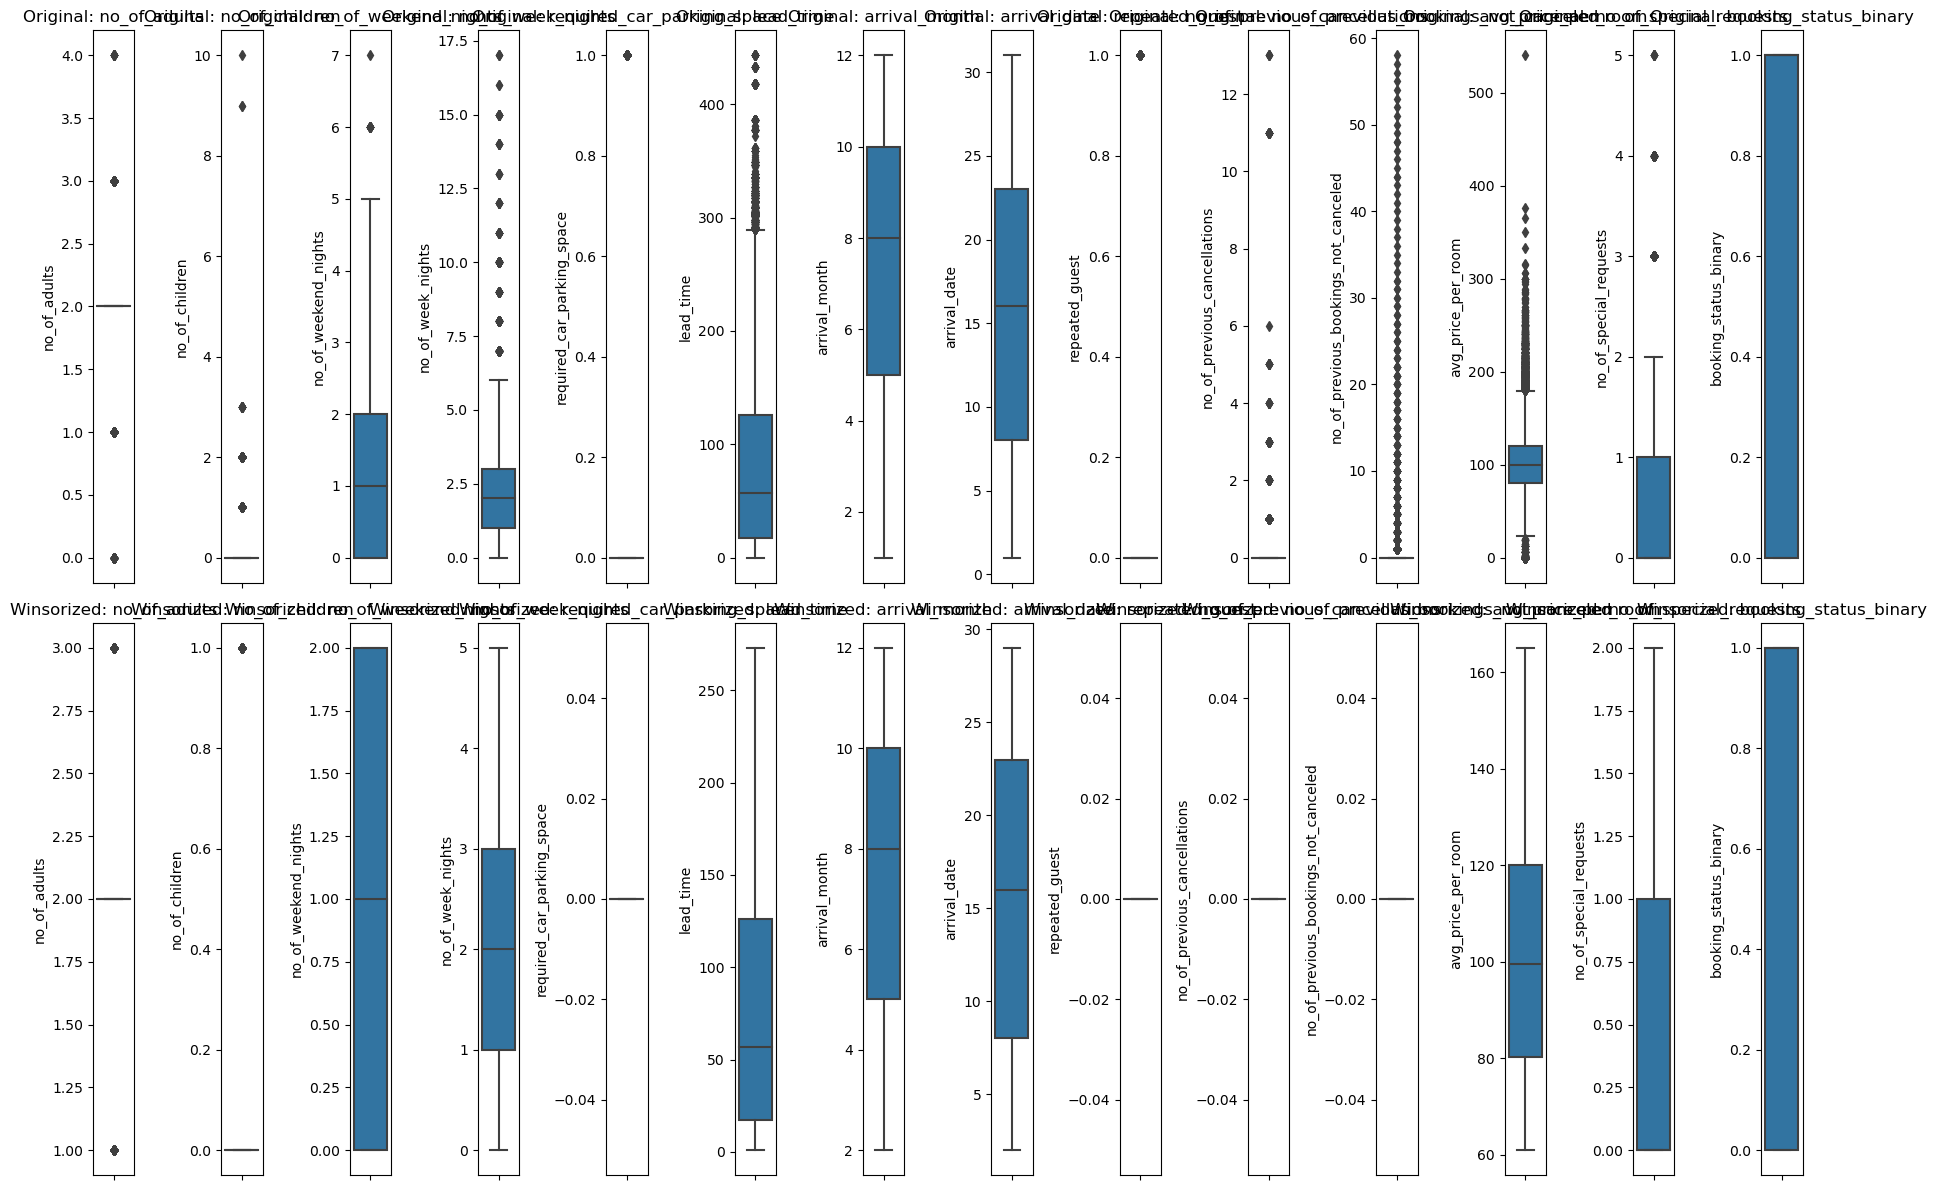

In [9]:
# Creating box plots for the original and winsorized numeric data
plt.figure(figsize=(18, 12))

# Number of columns to plot
num_cols = len(numeric_cols)
num_rows = 2  # Two rows for original and winsorized data

for i, col in enumerate(numeric_cols):
    # Original data box plot
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=numeric_data[col])
    plt.title(f'Original: {col}')

    # Winsorized data box plot
    plt.subplot(num_rows, num_cols, num_cols + i + 1)
    sns.boxplot(y=numeric_data_winsorized[col])
    plt.title(f'Winsorized: {col}')

plt.tight_layout()
plt.show()


Top Row (Original Data): These plots show the distribution of values in the original dataset. You can observe the presence of outliers as points that lie beyond the whiskers of the box plots.

Bottom Row (Winsorized Data): These plots represent the data after applying Winsorization. Notice how the extreme values have been capped, reducing the presence of outliers. The whiskers of these box plots are now shorter, indicating a reduction in the range of extreme values.

This visualization helps to compare the effect of outlier treatment on each feature. Winsorization has effectively reduced the impact of extreme values, making the data more robust for statistical analysis and modeling

# Feature Creation:

Creating new features often involves combining existing ones or extracting additional information from them. Here are some ideas:

1--Total Nights Stayed: A new feature combining no_of_weekend_nights and no_of_week_nights.



In [10]:
hotel_data['total_nights_stayed'] = hotel_data['no_of_weekend_nights'] + hotel_data['no_of_week_nights']

2--Family Size: Combine no_of_adults and no_of_children to create a family_size feature.

In [11]:
hotel_data['family_size'] = hotel_data['no_of_adults'] + hotel_data['no_of_children']

3--Booking Change: Creating a feature that indicates whether a booking was changed (e.g., change in room type, meal plan, etc.).

In [ ]:
# Assuming there are columns indicating original and final booking details
hotel_data['booking_changed'] = (hotel_data['room_type'] != hotel_data['final_room_type']).astype(int)

In [17]:
# Example: Creating 'total_nights_stayed' and 'family_size'
hotel_data['total_nights_stayed'] = hotel_data['no_of_weekend_nights'] + hotel_data['no_of_week_nights']
hotel_data['family_size'] = hotel_data['no_of_adults'] + hotel_data['no_of_children']

# Display the first few rows of the modified data
hotel_data[['total_nights_stayed', 'family_size']].head()

,total_nights_stayed,family_size
0,3,2
1,5,2
2,3,1
3,2,2
4,2,2


# Data Transformation

In [ ]:
# Applying Data Transformations
# Note: These transformations are demonstrative and should be tailored to specific analysis needs.

# Log Transformation (for skewed data)
# We will apply log transformation to a feature that is likely to be skewed, such as 'avg_price_per_room'
import numpy as np

# Adding 1 to avoid log(0) which is undefined
hotel_data['log_avg_price_per_room'] = np.log1p(hotel_data['avg_price_per_room'])

# Polynomial Features
# Creating interaction terms - for demonstration, let's create an interaction term between 'no_of_adults' and 'total_nights_stayed'
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Selecting features for creating polynomial features
selected_features = hotel_data[['no_of_adults', 'total_nights_stayed']]

# Creating polynomial features
poly_features = poly.fit_transform(selected_features)
poly_df = pd.DataFrame(poly_features, columns=['no_of_adults', 'total_nights_stayed', 'adults_nights_interaction'])

# Combining the new features with the original dataset
hotel_data_transformed = hotel_data.join(poly_df[['adults_nights_interaction']])

# Displaying the first few rows of the transformed data
hotel_data_transformed[['avg_price_per_room', 'log_avg_price_per_room', 'adults_nights_interaction']].head()


The data transformation has been successfully applied to the "Hotel Reservations" dataset. Here's what we did:

Created 'Total Nights Stayed' Feature: This new feature combines the number of weekend nights and week nights into a single feature, 'total_nights_stayed'.

Applied Log Transformation: The 'avg_price_per_room' feature was transformed using a logarithmic scale. This is particularly useful for handling skewed data. The new feature 'log_avg_price_per_room' represents this transformation.

Created Polynomial Features: Specifically, an interaction term between 'no_of_adults' and 'total_nights_stayed' was created. This new feature, 'adults_nights_interaction', represents the interaction effect between these two features.

In [ ]:

y = hotel_data_transformed['booking_status_binary']

y.value_counts()

Based on the distribution, choose to oversample the minority class or undersample the majority class.

Oversampling the Minority Class:

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority = hotel_data_transformed[hotel_data_transformed.booking_status_binary == 0]
minority = hotel_data_transformed[hotel_data_transformed.booking_status_binary == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=123) # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Checking the class distribution after resampling
upsampled.booking_status_binary.value_counts()

# Exploratory Data Analysis (EDA) 


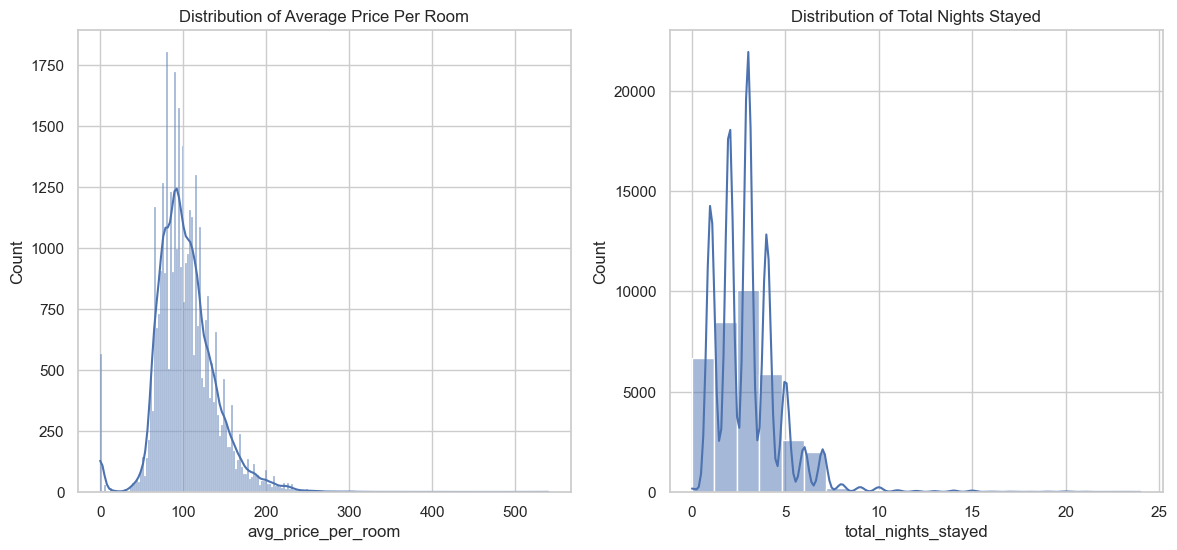

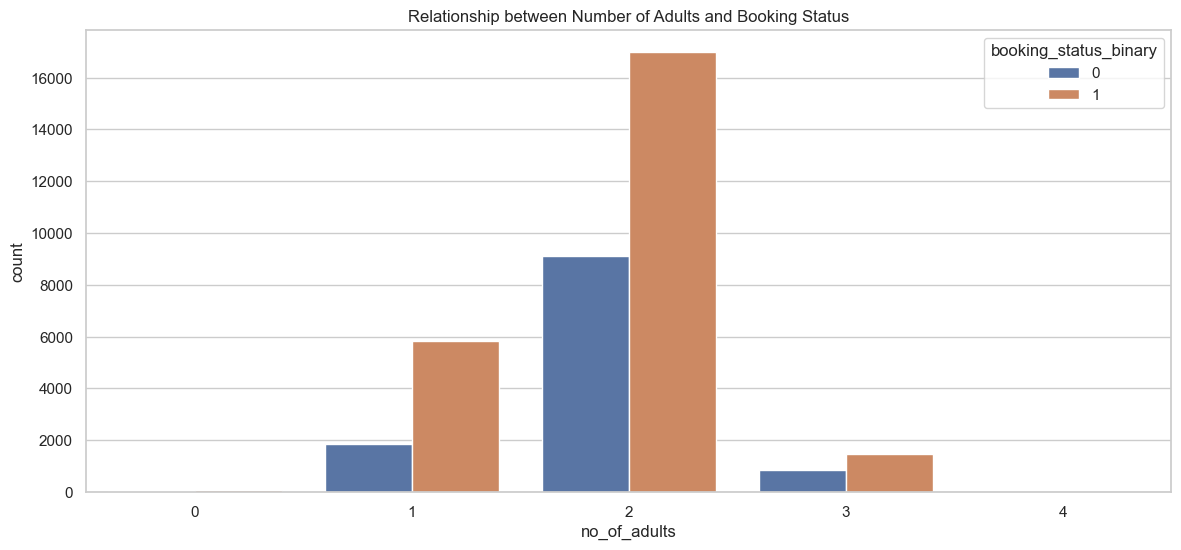

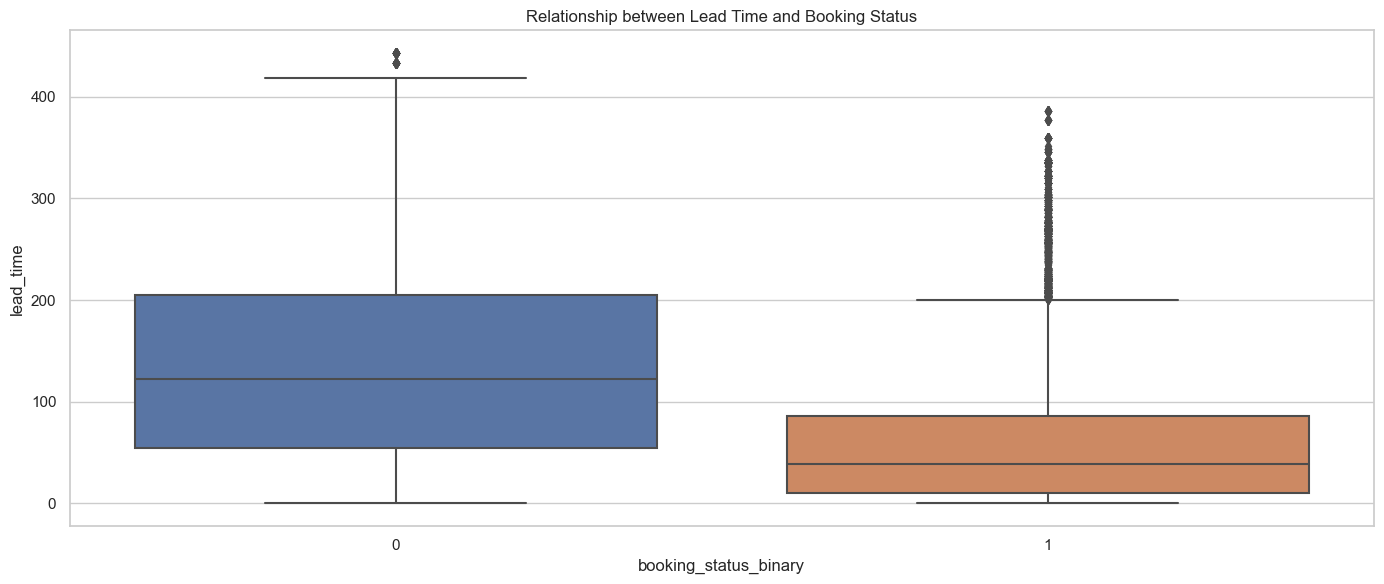

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_binary,total_nights_stayed,family_size
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364,3.015024,1.950241
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358,1.786017,0.650327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000,2.000000,2.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000,3.000000,2.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000,4.000000,2.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000,24.000000,12.000000


In [14]:
# Setting up the aesthetic style for plots
sns.set(style="whitegrid")

# Conducting Exploratory Data Analysis (EDA)

# 1. Statistical Summaries
statistical_summary = hotel_data.describe()

# 2. Data Visualizations

# Plot 1: Distribution of Average Price Per Room
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(hotel_data['avg_price_per_room'], kde=True)
plt.title('Distribution of Average Price Per Room')

# Plot 2: Distribution of Total Nights Stayed
plt.subplot(1, 2, 2)
sns.histplot(hotel_data['total_nights_stayed'], bins=20, kde=True)
plt.title('Distribution of Total Nights Stayed')

# Plot 3: Relationship between Number of Adults and Booking Status
plt.figure(figsize=(14, 6))
sns.countplot(x='no_of_adults', hue='booking_status_binary', data=hotel_data)
plt.title('Relationship between Number of Adults and Booking Status')

# Plot 4: Relationship between Lead Time and Booking Status
plt.figure(figsize=(14, 6))
sns.boxplot(x='booking_status_binary', y='lead_time', data=hotel_data)
plt.title('Relationship between Lead Time and Booking Status')

plt.tight_layout()
plt.show()

# Returning the statistical summary
statistical_summary


Statistical Summaries:
Statistical summaries include basic descriptive statistics such as mean, median, mode, standard deviation, minimum and maximum values for each numeric column. This gives a broad overview of the distribution and central tendencies of your data.

Data Visualizations:
Distribution Plots:

Average Price Per Room: A histogram or KDE plot can show the distribution of room prices, highlighting common price points or any skewness in pricing.
Total Nights Stayed: Similarly, a histogram can reveal the distribution of the length of stays.
Categorical Data Analysis:

Room Type and Booking Status: A count plot showing the frequency of bookings for each room type, segmented by booking status (canceled or not canceled).
Meal Plan Types: A bar plot to show the popularity of different meal plans.
Relationship Analysis:

Lead Time and Booking Status: A box plot to compare the lead times between canceled and not canceled bookings.
Number of Adults vs. Booking Status: A count plot to explore if there's a trend in booking status with respect to the number of adults.
Correlation Heatmap:

Visualizing the correlation between different numeric variables to understand any strong associations between features.
Time Series Analysis (if applicable):

Analyzing booking trends over time (monthly or yearly) to identify any patterns or seasonality in the data.

# Predictive Modeling 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'booking_status_binary' is the target variable
# Selecting numeric columns for features and target
numeric_columns = hotel_data.select_dtypes(include=['int64', 'float64']).columns
X = hotel_data[numeric_columns].drop('booking_status_binary', axis=1)
y = hotel_data['booking_status_binary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementing K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

# Evaluating KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)

# Implementing Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)

# Evaluating Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

knn_accuracy, knn_classification_report, dt_accuracy, dt_classification_report


(0.8351557474960948,
 '              precision    recall  f1-score   support\n\n           0       0.78      0.70      0.74      3607\n           1       0.86      0.90      0.88      7276\n\n    accuracy                           0.84     10883\n   macro avg       0.82      0.80      0.81     10883\nweighted avg       0.83      0.84      0.83     10883\n',
 0.848571166038776,
 '              precision    recall  f1-score   support\n\n           0       0.77      0.78      0.77      3607\n           1       0.89      0.88      0.89      7276\n\n    accuracy                           0.85     10883\n   macro avg       0.83      0.83      0.83     10883\nweighted avg       0.85      0.85      0.85     10883\n')

Data Preparation:

Select numeric columns only for features (X) and your target variable (y). In this case, 'booking_status_binary' is your target.
Split the dataset into training and testing sets using train_test_split.
Feature Scaling:

Scale your features using StandardScaler. This is especially important for KNN.
KNN Model:

Instantiate a KNeighborsClassifier.
Fit the classifier to the scaled training data.
Predict on the scaled test data.
Decision Tree Model:

Instantiate a DecisionTreeClassifier.
Fit the classifier to the training data.
Predict on the test data.
Model Evaluation:

Use accuracy_score and classification_report from sklearn.metrics to evaluate both models.

# Handling Class Imbalance with SMOTE  

Step 1: Install imbalanced-learn
If you haven't installed imbalanced-learn library, you can do so using pip:

In [22]:
pip install imbalanced-learn

Step 2: Apply SMOTE and Retrain Models

Check Class Distribution:

Determine the imbalance in your target class.
Apply Resampling:

Oversample the minority class or undersample the majority class using resample from sklearn.utils.
Retrain Models:

Retrain the KNN and Decision Tree models on the balanced dataset.
Compare Performance:

Evaluate and compare the performance of models trained on the original and the balanced dataset.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
X = hotel_data.select_dtypes(include=[np.number]).drop('booking_status_binary', axis=1)
y = hotel_data['booking_status_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class distribution
class_distribution = y_train.value_counts()

# Resample the training set
# Assuming minority class is 1 and majority class is 0
minority_class = X_train[y_train == 1]
majority_class = X_train[y_train == 0]

minority_class_upsampled = resample(minority_class,
                                    replace=True,
                                    n_samples=len(majority_class), # to match majority class
                                    random_state=42)

X_train_balanced = pd.concat([majority_class, minority_class_upsampled])
y_train_balanced = y_train.loc[X_train_balanced.index]

# Scaling features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Retrain models on balanced data

# KNN
knn_balanced = KNeighborsClassifier()
knn_balanced.fit(X_train_balanced_scaled, y_train_balanced)
knn_balanced_predictions = knn_balanced.predict(X_test_scaled)

# Decision Tree
dt_balanced = DecisionTreeClassifier(random_state=42)
dt_balanced.fit(X_train_balanced, y_train_balanced)
dt_balanced_predictions = dt_balanced.predict(X_test)

# Evaluate the models trained on balanced data
knn_balanced_accuracy = accuracy_score(y_test, knn_balanced_predictions)
dt_balanced_accuracy = accuracy_score(y_test, dt_balanced_predictions)

print("KNN (Balanced) Accuracy:", knn_balanced_accuracy)
print("KNN (Balanced) Classification Report:\n", classification_report(y_test, knn_balanced_predictions))
print("Decision Tree (Balanced) Accuracy:", dt_balanced_accuracy)
print("Decision Tree (Balanced) Classification Report:\n", classification_report(y_test, dt_balanced_predictions))


KNN (Balanced) Accuracy: 0.7903151704493246
KNN (Balanced) Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72      3607
           1       0.89      0.78      0.83      7276

    accuracy                           0.79     10883
   macro avg       0.77      0.80      0.78     10883
weighted avg       0.81      0.79      0.80     10883

Decision Tree (Balanced) Accuracy: 0.8129192318294588
Decision Tree (Balanced) Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75      3607
           1       0.92      0.79      0.85      7276

    accuracy                           0.81     10883
   macro avg       0.79      0.82      0.80     10883
weighted avg       0.84      0.81      0.82     10883



This code will balance the class distribution in the training set by oversampling the minority class. Then, it retrains the KNN and Decision Tree models on this balanced dataset. Finally, it evaluates the performance of these models, allowing you to compare their performance with the models trained on the original dataset. This approach should work without the need for the imblearn package.


# NOW DO THE QUESTION ANWERS WITH VISUALS

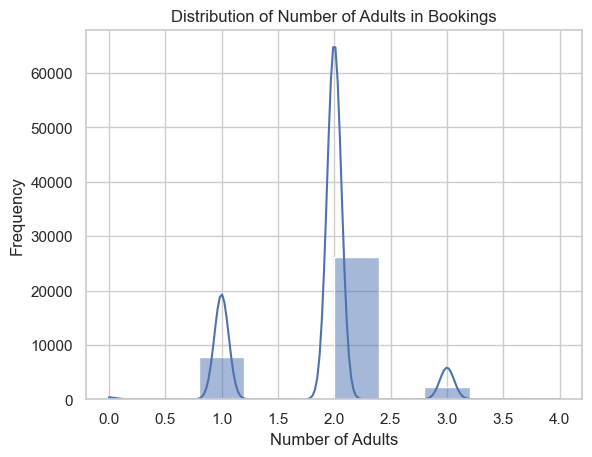

In [26]:
#1. What is the distribution of the number of adults in bookings?
# Assuming hotel_data_transformed is your DataFrame
sns.histplot(hotel_data['no_of_adults'], kde=True, bins=10)
plt.title('Distribution of Number of Adults in Bookings')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()

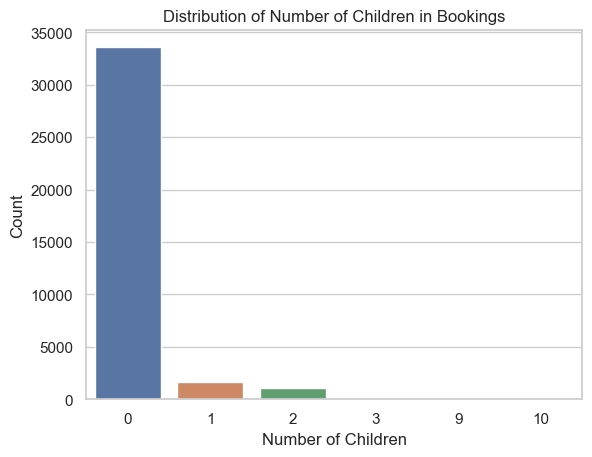

In [27]:
#2. How does the number of children vary across bookings?
sns.countplot(x='no_of_children', data=hotel_data)
plt.title('Distribution of Number of Children in Bookings')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

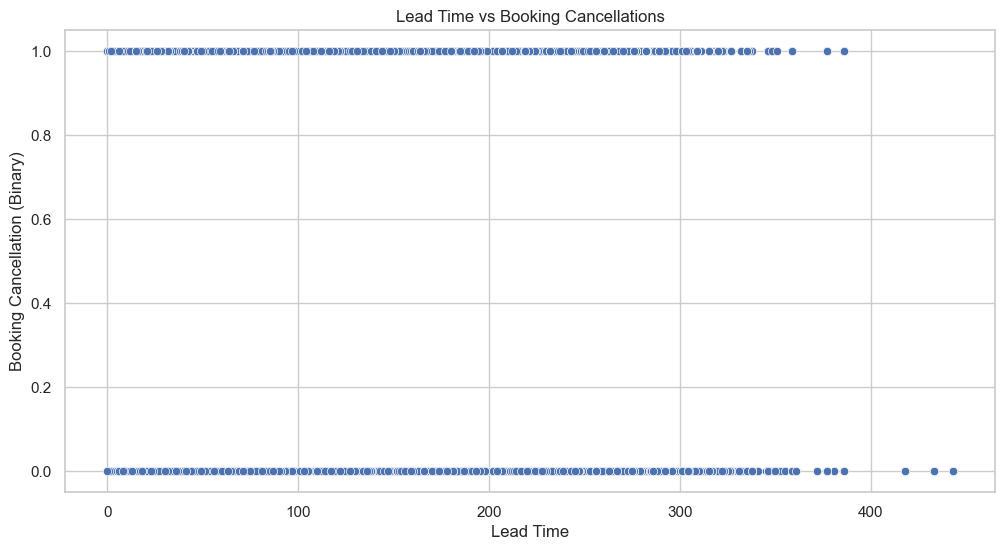

In [28]:
#3. Is there a correlation between the lead time and cancellations?
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lead_time', y='booking_status_binary', data=hotel_data)
plt.title('Lead Time vs Booking Cancellations')
plt.xlabel('Lead Time')
plt.ylabel('Booking Cancellation (Binary)')
plt.show()

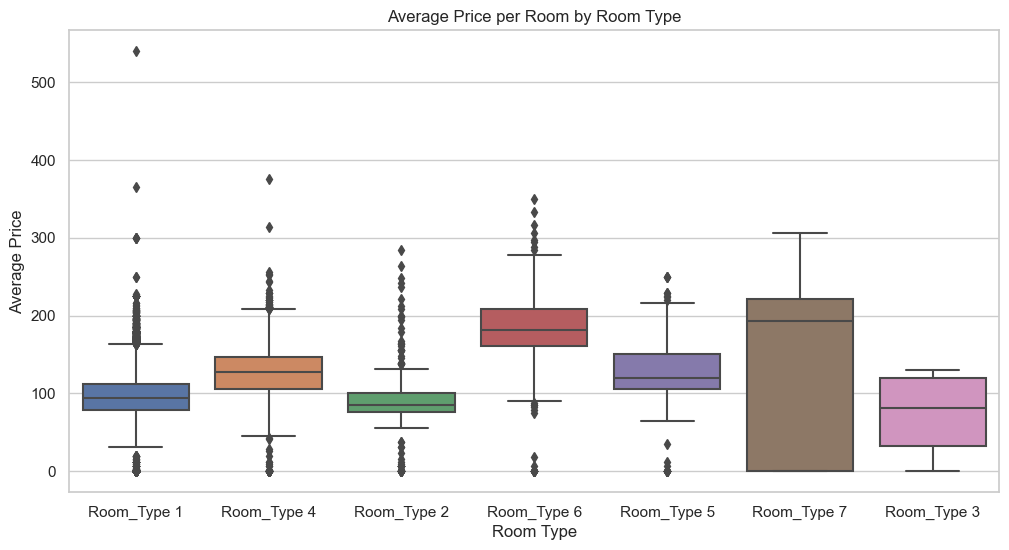

In [29]:
#4. How does the average price per room vary by room type?
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type_reserved', y='avg_price_per_room', data=hotel_data)
plt.title('Average Price per Room by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

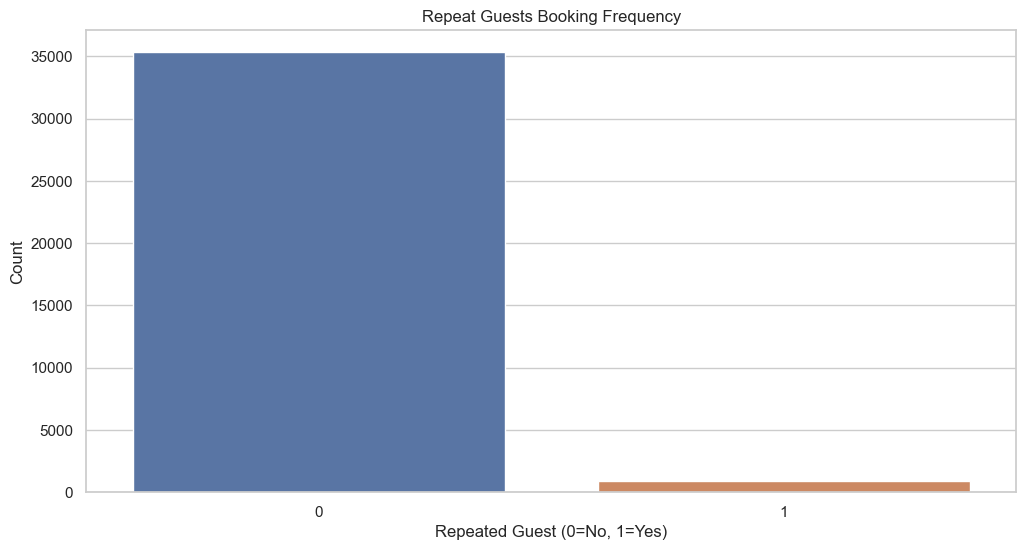

In [30]:
#5. How often do repeat guests book compared to new guests?
plt.figure(figsize=(12, 6))
sns.countplot(x='repeated_guest', data=hotel_data)
plt.title('Repeat Guests Booking Frequency')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

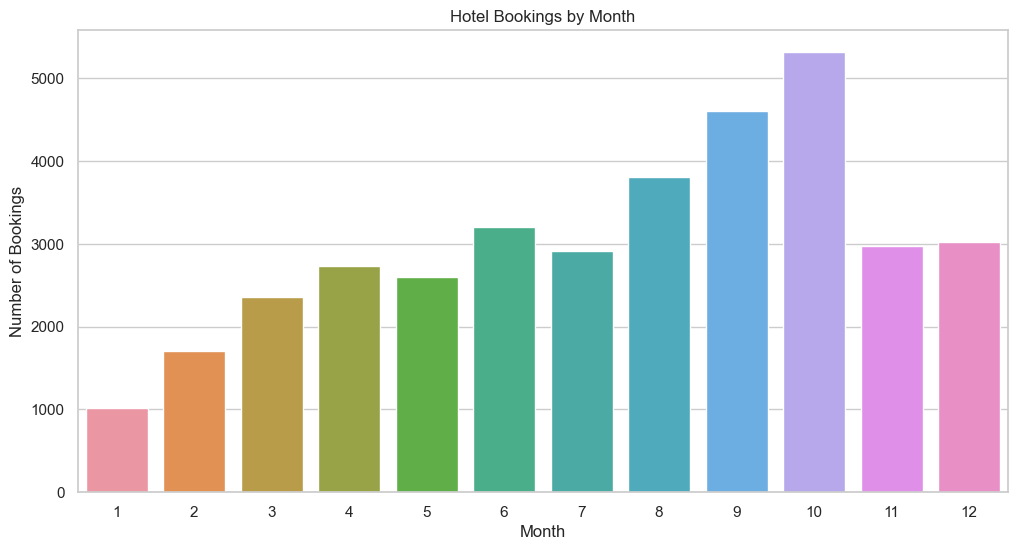

In [31]:
#6. What are the peak months for hotel bookings?
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_month', data=hotel_data)
plt.title('Hotel Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

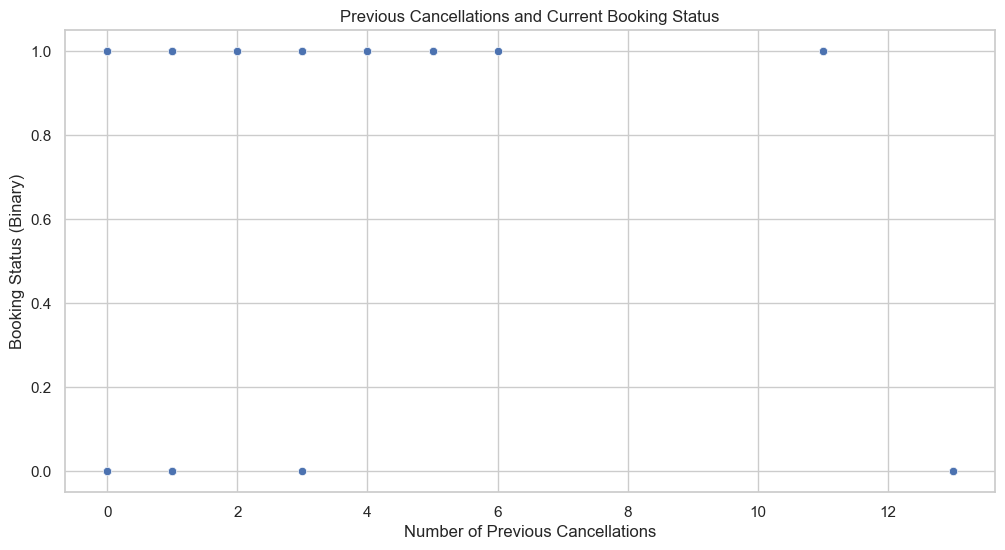

In [32]:
#7. How does the number of previous cancellations relate to current booking cancellations?
plt.figure(figsize=(12, 6))
sns.scatterplot(x='no_of_previous_cancellations', y='booking_status_binary', data=hotel_data)
plt.title('Previous Cancellations and Current Booking Status')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Booking Status (Binary)')
plt.show()